In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("ex5data.txt", header=None, sep=",")
x = df.values[:, :-1]
y = df.values[:, -1]
m = len(y)

# Separate positive and negative examples
x_pos = x[y == 1, :]
x_neg = x[y == 0, :]

# Calculate the number of examples for training (70%) and testing (30%)
num_pos_train = int(0.7 * len(x_pos))
num_neg_train = int(0.7 * len(x_neg))
num_pos_test = len(x_pos) - num_pos_train
num_neg_test = len(x_neg) - num_neg_train

# Set the random seed for reproducibility
np.random.seed(0)

# Shuffle the indices
pos_indices = np.random.permutation(len(x_pos))
neg_indices = np.random.permutation(len(x_neg))

# Select training and testing indices
train_pos_indices = pos_indices[:num_pos_train]
train_neg_indices = neg_indices[:num_neg_train]
test_pos_indices = pos_indices[num_pos_train:]
test_neg_indices = neg_indices[num_neg_train:]

# Create the DataFrames
train_X_ori = np.vstack((x_pos[train_pos_indices], x_neg[train_neg_indices]))
train_y = np.hstack((np.ones(num_pos_train), np.zeros(num_neg_train)))
test_X_ori = np.vstack((x_pos[test_pos_indices], x_neg[test_neg_indices]))
test_y = np.hstack((np.ones(num_pos_test), np.zeros(num_neg_test)))

# # Add intercept term to X
# train_X = np.hstack((np.ones((train_X.shape[0], 1)), train_X))
# test_X = np.hstack((np.ones((test_X.shape[0], 1)), test_X))

# # Plotting the data
# plt.scatter(x_pos[:, 0], x_pos[:, 1], c='r', label='Positive')
# plt.scatter(x_neg[:, 0], x_neg[:, 1], c='k', label='Negative')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()


In [147]:
def mapfeature(x1, x2, m, degree):
    X = np.ones((m, 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            X = np.concatenate((X, np.reshape((x1**(i-j))*x2**j, (m,1))), 1)
    return X
degree = 6
train_X = mapfeature(train_X_ori[:,0], train_X_ori[:,1], train_X_ori.shape[0], degree)
test_X = mapfeature(test_X_ori[:,0], test_X_ori[:,1], test_X_ori.shape[0], degree)
print(train_X.shape)

(82, 28)


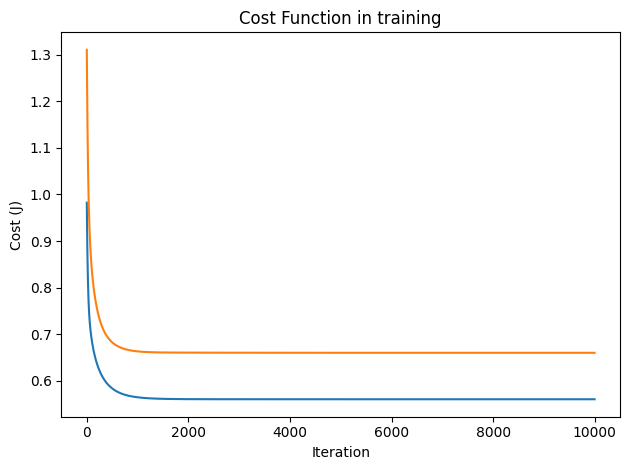

In [148]:
# Regularized logistic regression L2
ite = 10000
lr = 0.1
lambda_ = 1  # Regularization parameter
J_train = np.zeros(ite)
J_test = np.zeros(ite)
train_y = np.reshape(train_y, (len(train_y), 1))
test_y = np.reshape(test_y, (len(test_y), 1))
np.random.seed(2)
theta = np.random.rand(train_X.shape[1], 1)
m_train = len(train_y)
m_test = len(test_y)
z = np.dot(train_X, theta)
h = 1.0 / (1.0 + np.exp(-z))
z_test = np.dot(test_X, theta)
h_test = 1.0 / (1.0 + np.exp(-z_test))

for i in range(ite):
    theta_tmp = theta.copy()
    theta_tmp[0] = 0
    gradient = (1 / m_train) * np.dot(train_X.T, (h - train_y)) + (lambda_ / m_train) * theta_tmp
    theta = theta - lr * gradient
    theta_tmp = theta.copy()
    theta_tmp[0] = 0
    z = np.dot(train_X, theta)
    h = 1.0 / (1.0 + np.exp(-z))
    z_test = np.dot(test_X, theta)
    h_test = 1.0 / (1.0 + np.exp(-z_test))
    J_train[i] = np.mean(-train_y*np.log(h)-(1-train_y)*np.log(1-h)) + (lambda_ / (2 * m_train)) * np.sum(np.square(theta_tmp))
    J_test[i] = np.mean(-test_y*np.log(h_test)-(1-test_y)*np.log(1-h_test)) + (lambda_ / (2 * m_test)) * np.sum(np.square(theta_tmp))

# Create a figure and a set of subplots
fig, axs = plt.subplots()

axs.plot(J_train)
axs.plot(J_test)
axs.set_xlabel('Iteration')
axs.set_ylabel('Cost (J)')
axs.set_title('Cost Function in training')

# Layout so plots do not overlap
fig.tight_layout()

/tmp/ipykernel_55054/2438450475.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(mapfeature(u[i], v[j], 1, degree), theta)


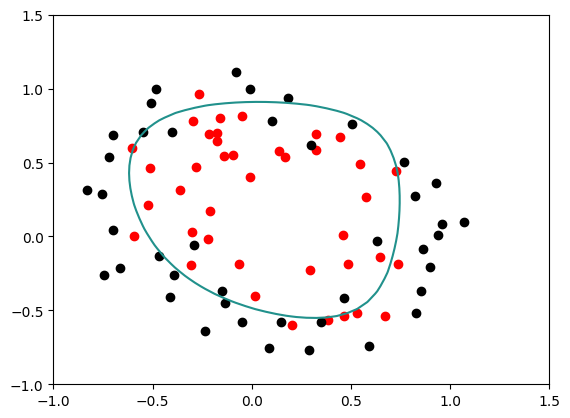

In [149]:
plt.scatter(x_pos[train_pos_indices][:,0], x_pos[train_pos_indices][:,1], c='r')
plt.scatter(x_neg[train_neg_indices][:,0], x_neg[train_neg_indices][:,1],c='k')
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(mapfeature(u[i], v[j], 1, degree), theta)
z = z.T
plt.contour(u, v, z, 0)

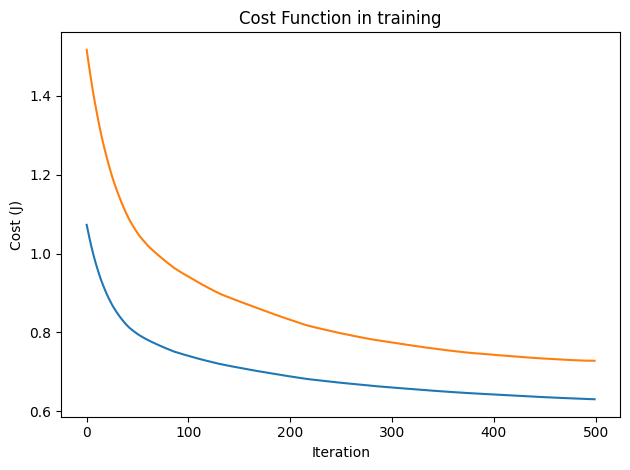

In [150]:
# Regularized logistic regression L1
ite = 500
lr = 0.1
lambda_ = 1
J_train = np.zeros(ite)
J_test = np.zeros(ite)
train_y = np.reshape(train_y, (len(train_y), 1))
test_y = np.reshape(test_y, (len(test_y), 1))
np.random.seed(2)
theta = np.random.rand(train_X.shape[1], 1)
m_train = len(train_y)
m_test = len(test_y)
z = np.dot(train_X, theta)
h = 1.0 / (1.0 + np.exp(-z))
z_test = np.dot(test_X, theta)
h_test = 1.0 / (1.0 + np.exp(-z_test))

for i in range(ite):
    theta_tmp = theta.copy()
    theta_tmp[0] = 0 
    gradient = (1 / m_train) * np.dot(train_X.T, (h - train_y)) + (lambda_ / m_train) * np.sign(theta_tmp)
    theta = theta - lr * gradient
    theta_tmp = theta.copy()
    theta_tmp[0] = 0
    z = np.dot(train_X, theta)
    h = 1.0 / (1.0 + np.exp(-z))
    z_test = np.dot(test_X, theta)
    h_test = 1.0 / (1.0 + np.exp(-z_test))
    J_train[i] = np.mean(-train_y*np.log(h)-(1-train_y)*np.log(1-h)) + (lambda_ / m_train) * np.sum(np.abs(theta_tmp))
    J_test[i] = np.mean(-test_y*np.log(h_test)-(1-test_y)*np.log(1-h_test)) + (lambda_ / m_test) * np.sum(np.abs(theta_tmp))

# Create a figure and a set of subplots
fig, axs = plt.subplots()

axs.plot(J_train)
axs.plot(J_test)
axs.set_xlabel('Iteration')
axs.set_ylabel('Cost (J)')
axs.set_title('Cost Function in training')

# Layout so plots do not overlap
fig.tight_layout()

/tmp/ipykernel_55054/2438450475.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(mapfeature(u[i], v[j], 1, degree), theta)


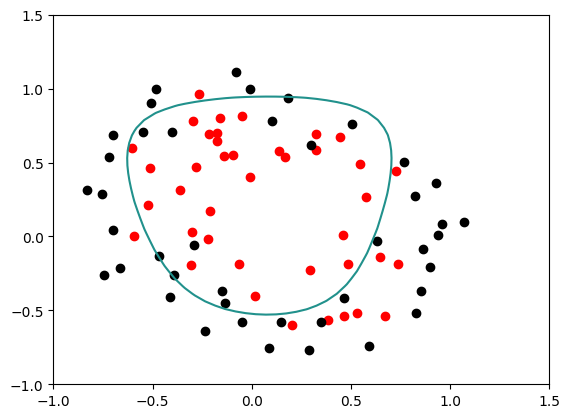

In [151]:
plt.scatter(x_pos[train_pos_indices][:,0], x_pos[train_pos_indices][:,1], c='r')
plt.scatter(x_neg[train_neg_indices][:,0], x_neg[train_neg_indices][:,1],c='k')
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(mapfeature(u[i], v[j], 1, degree), theta)
z = z.T
plt.contour(u, v, z, 0)

In [119]:
train_X

array([[ 1.00000000e+00, -3.00120000e-01,  2.70470000e-02, ...,
         4.82021355e-08, -4.34400626e-09,  3.91484531e-10],
       [ 1.00000000e+00, -3.63480000e-01,  3.12130000e-01, ...,
         1.25401603e-03, -1.07685711e-03,  9.24726012e-04],
       [ 1.00000000e+00,  6.44590000e-01, -1.41080000e-01, ...,
         1.64599659e-04, -3.60255665e-05,  7.88483675e-06],
       ...,
       [ 1.00000000e+00, -6.97580000e-01,  4.16670000e-02, ...,
         1.46675295e-06, -8.76103033e-08,  5.23303206e-09],
       [ 1.00000000e+00,  4.66010000e-01, -4.18860000e-01, ...,
         6.68445534e-03, -6.00813494e-03,  5.40024334e-03],
       [ 1.00000000e+00,  8.63480000e-01, -8.26020000e-02, ...,
         3.47109753e-05, -3.32051233e-06,  3.17645990e-07]])